In [36]:
import pandas as pd
import numpy as np
import seaborn as sns

## Importing Data

In [37]:
Homeless_gender = pd.read_excel("../../Data/homeless population by Gender.xlsx")
Homeless_gender.head(10)

,Yeasrs,Cisgender_women,Cisgender_men,Transgender_people,Gender_non_conforming
0,2015,224344,339075,1289,0
1,2016,217268,330890,1770,0
2,2017,214975,333049,2088,884
3,2018,216211,332925,2521,1173
4,2019,219911,343187,3255,1362
5,2020,223578,352211,3161,1460


In [38]:
Homeless_gender.mean()

Yeasrs                      2017.500000
Cisgender_women           219381.166667
Cisgender_men             338556.166667
Transgender_people          2347.333333
Gender_non_conforming        813.166667
dtype: float64

In [40]:
Homeless_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Yeasrs                  6 non-null      int64
 1   Cisgender_women         6 non-null      int64
 2   Cisgender_men           6 non-null      int64
 3   Transgender_people      6 non-null      int64
 4   Gender_non_conforming   6 non-null      int64
dtypes: int64(5)
memory usage: 368.0 bytes


In [46]:
Homeless_gender.sort_values(by=['Cisgender_women', 'Cisgender_men', 'Transgender_people', 'Gender_non_conforming'], ascending=[True, True, True, True])

KeyError: 'Cisgender_women'

array([[<AxesSubplot:title={'center':'Yeasrs'}>,
        <AxesSubplot:title={'center':'Cisgender_women '}>],
       [<AxesSubplot:title={'center':'Cisgender_men '}>,
        <AxesSubplot:title={'center':'Transgender_people '}>],
       [<AxesSubplot:title={'center':'Gender_non_conforming '}>,
        <AxesSubplot:>]], dtype=object)

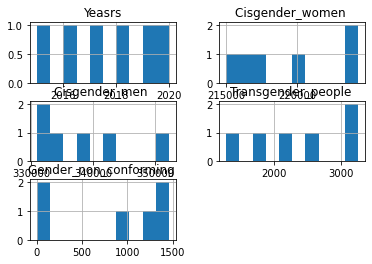

In [47]:
Homeless_gender.hist()

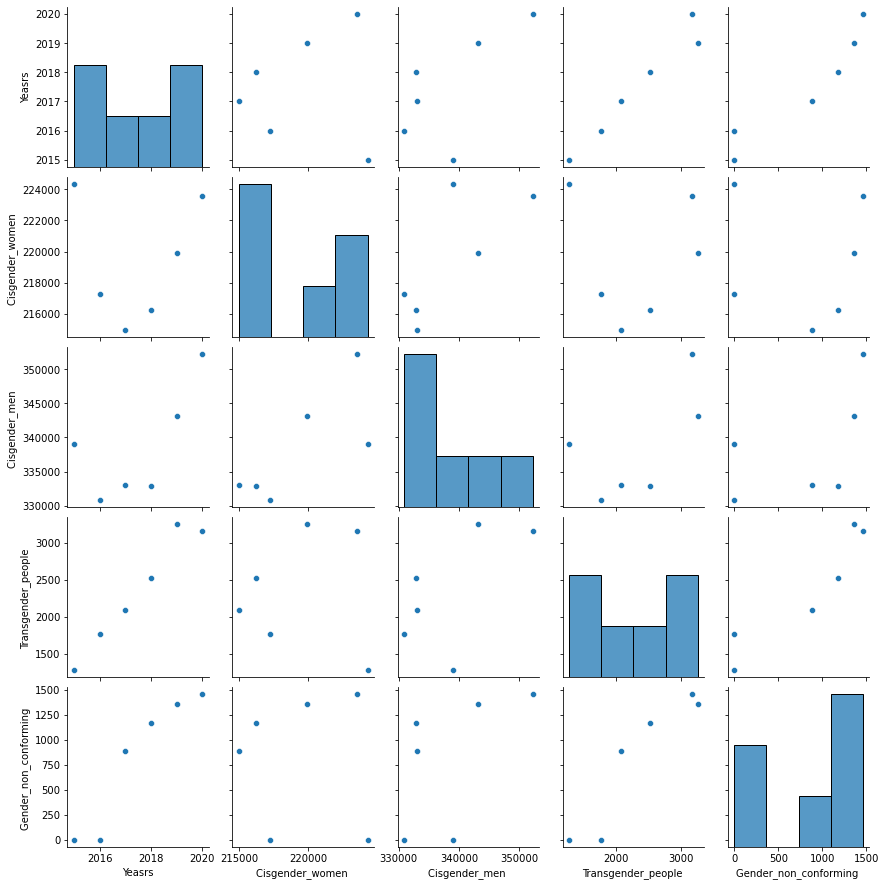

In [29]:
sns.pairplot(Homeless_gender)

# Checking for Normal Distribution

In [6]:
import pylab
import scipy.stats as stats

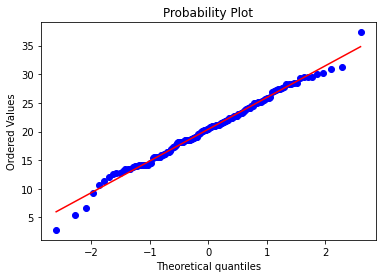

In [8]:
Homeless_gender = np.random.normal(loc = 20, scale=5, size=150)
stats.probplot(Homeless_gender, dist="norm", plot=pylab)
pylab.show()

C:\Users\hanyu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


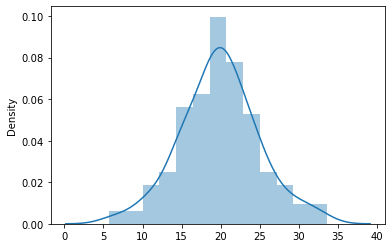

In [9]:
Homeless_gender = np.random.normal(loc = 20, scale=5, size=150)
ax = sns.distplot(Homeless_gender)

# Testing for normality using Chi-Square

In [30]:
from scipy.stats import chisquare
import numpy as np

In [33]:
Homeless_gender= np.random.normal(loc = 20, scale=5, size=150)
statistic,pvalue=chisquare(Homeless_gender)
print('statistics=%.3f, p=%.3f\n' % (statistic, pvalue))
if pvalue > 0.05:
    print('Normal Distribution')
else:
    print('Not Normal Distribution')

statistics=162.496, p=0.213

Normal Distribution


###  Looking for k-mean and clusters

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [52]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Homeless_gender)


KMeans(n_clusters=3)

KeyError: 'Cisgender_women'

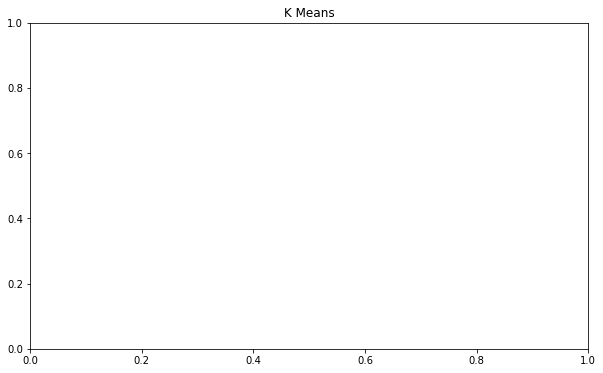

In [56]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(Homeless_gender['Cisgender_women'], Homeless_gender['Cisgender_men'], Homeless_gender['Transgender_people'], c=kmeans.labels_, cmap='viridis')


### Decision Trees

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [59]:
Homeless_gender.head()

,Yeasrs,Cisgender_women,Cisgender_men,Transgender_people,Gender_non_conforming
0,2015,224344,339075,1289,0
1,2016,217268,330890,1770,0
2,2017,214975,333049,2088,884
3,2018,216211,332925,2521,1173
4,2019,219911,343187,3255,1362


wrangling data

In [61]:
x = Homeless_gender.drop('Yeasrs',axis=1)
y = Homeless_gender['Yeasrs']

### setting up a Train Test Split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

Creating an initial Decision Tree

In [63]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier()

Assessing the model

In [64]:
treePredictions = decisionTree.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,treePredictions))
print(classification_report(y_test,treePredictions))

[[0 0 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 0 0]]
              precision    recall  f1-score   support

        2016       0.00      0.00      0.00       0.0
        2018       0.00      0.00      0.00       1.0
        2019       0.00      0.00      0.00       1.0
        2020       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\Users\hanyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanyu\anaconda3\lib\site-packages\sklearn\metrics\_cla